# Task 1: TITANIC SURVIVAL PREDICTION

## Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Data collection

In [2]:
# importing dataset
df=pd.read_csv("E:\\codsoft\\tested.csv")

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Finding the size of the dataset
df.shape

(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
# Getting the number of null values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# Dropping one column
df = df.drop('Cabin',axis = 1)

In [8]:
# Dropping one column
df = df.drop('Name',axis = 1)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [10]:
# filling with mean value for age
df ['Age'].fillna(df['Age'].mean(), inplace = True)
df ['Fare'].fillna(df['Fare'].mean(), inplace = True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data analysis 

In [12]:

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
# count of survived people
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

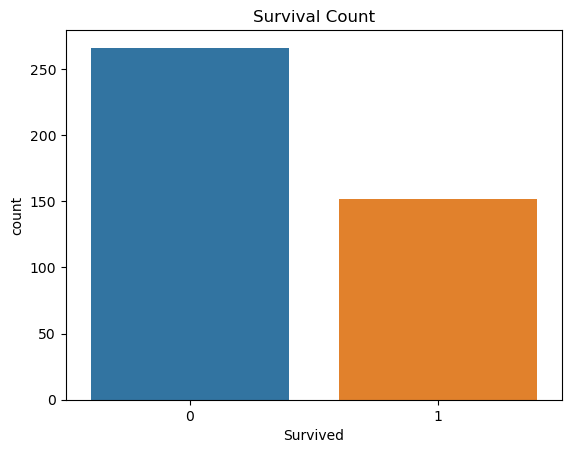

In [14]:
# Countplot of Survived
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

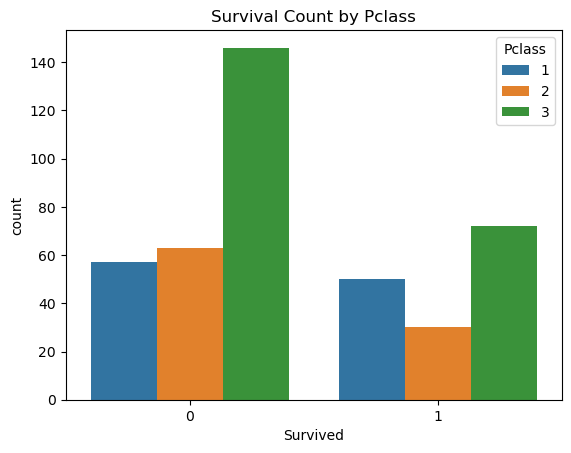

In [15]:
# Countplot of Survived based on Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Pclass')
plt.show()

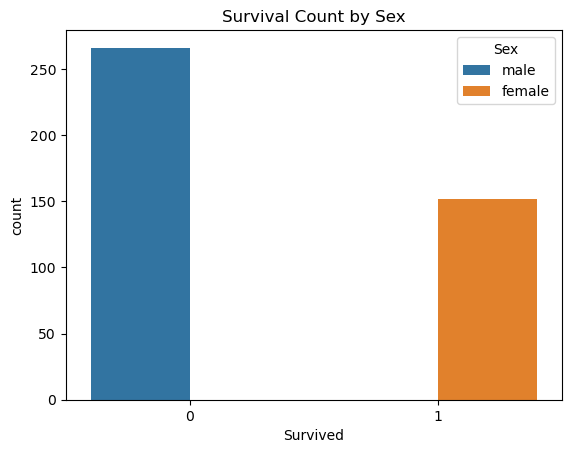

In [16]:
# Countplot of Survived based on Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.show()

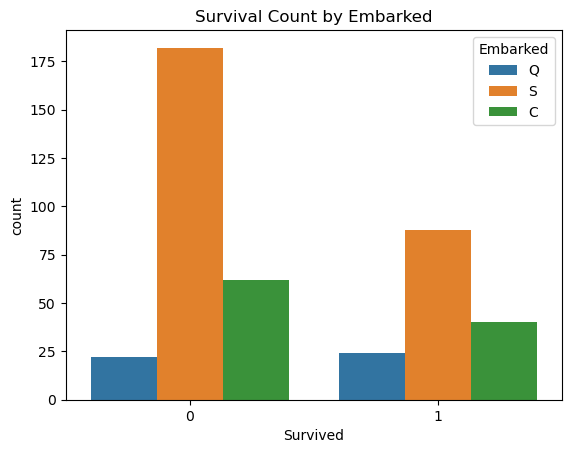

In [17]:
# Countplot of Survived based on Embarked
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Survival Count by Embarked')
plt.show()

In [20]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder() # By using labelencoder we change char into int to train the process

In [21]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [22]:
df['Sex']=le.fit_transform(df['Sex'])

In [23]:
df['Sex'].unique()

array([1, 0])

In [24]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [25]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [26]:
df['Embarked'].unique()

array([1, 2, 0])

## Feature selection

In [29]:
# Select features and target variable
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]
y = df['Survived']

In [44]:
print(X)

     Pclass       Age  SibSp  Parch      Fare  Sex  Embarked
0         3  34.50000      0      0    7.8292    1         1
1         3  47.00000      1      0    7.0000    0         2
2         2  62.00000      0      0    9.6875    1         1
3         3  27.00000      0      0    8.6625    1         2
4         3  22.00000      1      1   12.2875    0         2
..      ...       ...    ...    ...       ...  ...       ...
413       3  30.27259      0      0    8.0500    1         2
414       1  39.00000      0      0  108.9000    0         0
415       3  38.50000      0      0    7.2500    1         2
416       3  30.27259      0      0    8.0500    1         2
417       3  30.27259      1      1   22.3583    1         0

[418 rows x 7 columns]


In [45]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


## Random Forest Classifier

In [31]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Predictions on the test set
y_pred = model.predict(X_test)

In [34]:
# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 1.0


In [35]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[50  0]
 [ 0 34]]


In [36]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [38]:
# Make predictions on new data
new_data = df.head(5)[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]
predictions = model.predict(new_data)


In [42]:
# Display the predictions
print("\nPredictions on new data:")
for i in range(len(predictions)):
    prediction_label = "Survived" if predictions[i] == 0 else "Not Survived"
    print(f"Prediction for row {i + 1}: {prediction_label}")


Predictions on new data:
Prediction for row 1: Survived
Prediction for row 2: Not Survived
Prediction for row 3: Survived
Prediction for row 4: Survived
Prediction for row 5: Not Survived
